In [1]:
import pandas as pd

In [2]:
dt = pd.read_csv('Sf_complete.csv')

In [3]:
dt.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Duration'],
      dtype='object')

In [4]:
dt.Description,dt.Duration

(0             Accident on I-280 Northbound at Geneva Ave.
 1       #1 lane blocked due to accident on US-101 Sout...
 2       Slow lane blocked due to accident on US-101 So...
 3       Accident on I-280 Northbound at Exit 53 Aleman...
 4       Accident on US-101 Golden Gate Brg Southbound ...
                               ...                        
 9270                              At Paul Ave - Accident.
 9271                         At 4th St/5th St - Accident.
 9272                            At Vermont St - Accident.
 9273           At 4th St/5th St - Accident. Lane blocked.
 9274    Between US-101 (San Francisco) and Alemany Blv...
 Name: Description, Length: 9275, dtype: object,
 0       30
 1       30
 2       30
 3       30
 4       30
         ..
 9270    28
 9271    28
 9272    29
 9273    28
 9274    29
 Name: Duration, Length: 9275, dtype: int64)

In [5]:
X = dt.Description.apply(lambda v: v.rjust(200, ' ')).values

In [6]:
Y = dt.Duration.values

In [7]:
ord(X[0][0])

32

In [8]:
cc = list(set(' '.join(X.ravel())))

import numpy as np
from sklearn.preprocessing import OneHotEncoder as OH
oh = OH()
oh.fit(np.array(cc).reshape(-1,1))

TR = dict(zip(cc, oh.transform(np.array(cc).reshape(-1,1)).toarray()))

ARR=[]
for i in range(len(X)):
    TMP=[]
    for j in range(len(X[i])):
        TMP.append(TR[X[i][j]])
    ARR.append(TMP)
ARR=np.array(ARR)

In [9]:
AS = ARR.shape
AS

(9275, 200, 80)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [13]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
# model.add(layers.Embedding(input_dim=79, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(80,input_shape=(200,80)))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10,activation='sigmoid'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="adam", loss="mse", metrics=["mse"])
model.summary()

model.save_weights('default.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80)                51520     
_________________________________________________________________
dense (Dense)                (None, 10)                810       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 52,341
Trainable params: 52,341
Non-trainable params: 0
_________________________________________________________________


In [14]:
Y = np.log1p(Y)/8

In [15]:
X = ARR

In [16]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
def ml(y_true, y_pred):
    return tf.reduce_mean(tf.abs((y_true - y_pred)/y_true),axis=-1)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print('fold')
    Xtr,Xte = X[train_index], X[test_index]
    Ytr,Yte = Y[train_index], Y[test_index]
    
    X2tr,X2te = X2[train_index], X2[test_index]
    
    model.load_weights('default.h5')
#     model.compile(optimizer="adam", loss=ml, metrics=["mse"])
    model.fit([Xtr,X2tr],Ytr,epochs=3)

    print(mape(np.expm1(Yte*8), np.expm1(model.predict([Xte,X2te])*8)))

fold


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-165128c51a6a>", line 11, in <module>
    X2tr,X2te = X2[train_index], X2[test_index]
NameError: name 'X2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Software\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Software\Anaconda3\lib\site-packages\IP

In [80]:
X.shape

(9275,)

In [17]:
from sklearn.model_selection import train_test_split as tts
Xtr,Xte,Ytr,Yte = tts(ARR,,test_size=0.1)

OneHotEncoder()

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [65]:
inputs1 = keras.Input(shape=(200,80,))
inputs2 = keras.Input(shape=(30,))
yy = layers.Dense(30,activation='relu')(inputs2)
yy = layers.Dense(30,activation='relu')(yy)


xx = layers.LSTM(64)(inputs1)
xx = layers.Dense(16,activation='relu')(xx)

xx = layers.Concatenate(axis=1)([xx,yy])

xx = layers.Dense(1,activation='sigmoid')(xx)

model = keras.Model(inputs=[inputs1,inputs2], outputs=xx)

model.compile(optimizer="adam", loss="mse", metrics=["mse"])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 200, 80)      0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
lstm_14 (LSTM)                  (None, 64)           37120       input_9[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           930         input_10[0][0]                   
____________________________________________________________________________________________

In [81]:
dt = pd.read_csv('Sf_complete.csv')

In [83]:
dt.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Duration'],
      dtype='object')

In [89]:
dt.loc[:,['Temperature(F)','Precipitation(in)']]

Temperature(F)  Precipitation(in)
0               71.1                NaN
1               73.0                NaN
2               77.0                NaN
3               71.1                NaN
4               61.0                NaN
...              ...                ...
9270            64.0                0.0
9271            71.0                0.0
9272            78.0                0.0
9273            78.0                0.0
9274            74.0                0.0

[9275 rows x 2 columns]

In [54]:
dt['Temperature(F)']=dt['Temperature(F)']/dt['Temperature(F)'].max()

In [55]:
dt['monthidx'] = dt['monthidx']//12

In [59]:
dt = dt.loc[:,['Source', 'Severity', 'Distance(mi)', 'Side', 'County', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'monthidx', 'SHour']]

In [61]:
X2 = dt.values

In [62]:
X2.shape

(8753, 30)

In [149]:
from sklearn.preprocessing import OneHotEncoder as OH
oh = OH()
oh.fit(np.array(list(set(X.ravel()))).reshape(-1,1))

(9275, 200, 80)

In [194]:
from sklearn.model_selection import train_test_split as tts
Xtr,Xte,Ytr,Yte = tts(ARR,np.log1p(Y)/8,test_size=0.1)

Epoch 1/2
8347/8347 [==============================] - 96s 12ms/step - loss: 0.0098 - mse: 0.0098
Epoch 2/2
8347/8347 [==============================] - 93s 11ms/step - loss: 0.0090 - mse: 0.0090


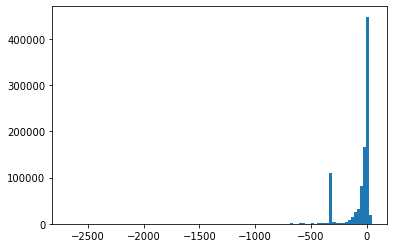

In [183]:
import matplotlib.pyplot as plt
plt.hist((np.expm1(model.predict(ARR[:100])*8)-Y).ravel(),bins=100)
print()

103.37442765440088

In [78]:
from sklearn.preprocessing import QuantileTransformer as QT
qt = QT(80)
qt.fit(ARR.ravel().reshape(-1,1))

C:\Software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_quantiles=80 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


QuantileTransformer(n_quantiles=80)

In [80]:
ARR=qt.transform(ARR.ravel().reshape(-1,1)).ravel().reshape(AS)

In [81]:
len(set(ARR.ravel()))

79

In [99]:
from sklearn.preprocessing import OneHotEncoder as OH
oh = OH()
oh.fit(ARR.ravel().reshape(-1,1))

OneHotEncoder()

In [114]:
oh.transform(ARR[0].ravel().reshape(-1,1)).toarray().shape

(200, 79)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 4,693
Trainable params: 4,693
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1
3424/9275 [==========>...................] - ETA: 30s - loss: 17.7262 - mse: 17.7262 ETA: 30s - loss: 17.7498 - mse: 1

KeyboardInterrupt: 

In [89]:
model.predict(ARR[:100])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],